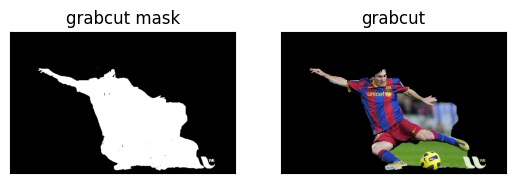

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#读取图像
img = cv.imread('../data/messi5.jpg')
#转换为rgb
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#创建一个与图像相同大小的掩膜
mask = np.zeros(img.shape[:2],np.uint8)

#创建以0填充的前景和背景模型
bgdModel = np.zeros((1,65),np.float64)
#创建以0填充的前景和背景模型
fgdModel = np.zeros((1,65),np.float64)
#定义矩形区域
#selectROI函数的参数为图像,可以通过鼠标拖动来选择矩形区域
#rect=cv.selectROI(img)
rect = (50,50,450,290)
#执行grabcut算法
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

# 创建一个掩膜，其中所有0和2像素被转换为0，所有1和3像素被转换为1
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#阈值处理mask2，将其转换为二进制图像
mask3 = mask2*255
#将新的掩膜与我们的图像相乘以获得我们的分割图像
img = img*mask2[:,:,np.newaxis]
#显示图像
plt.subplot(121),plt.imshow(mask3,cmap = 'gray')
plt.title('grabcut mask'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('grabcut'), plt.xticks([]), plt.yticks([])
plt.show()

